# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [8]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a
a[-3:]
# reverse the list
a.reverse()
# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
squared = [x*x for x in a]

[36, 25, 16, 9, 4, 1]

In [10]:
# create a numpy array from this list
import numpy as np
b = np.array(a) # change this

array([36, 25, 16,  9,  4,  1])

In [12]:
# find the mean of b
b.mean()

15.166666666666666

In [23]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
new_sq=list(np.square(b))
new_sq.reverse()

[1, 16, 81, 256, 625, 1296]

In [47]:
# change b from a length-6 list to a 2x3 matrix
b_matrix=np.matrix([b[:3],b[3:6]])

In [52]:
# find the mean value of each row
b_matrix.mean(1)

matrix([[25.66666667],
        [ 4.66666667]])

In [54]:
# find the mean value of each column
b_matrix.mean(0)

matrix([[22.5, 14.5,  8.5]])

In [88]:
# find the third column of b
b_matrix[:,2]

matrix([[16],
        [ 1]])

In [80]:
# load in the "starbucks_clean.csv" dataset
import pandas as pd
df= pd.read_csv('/Users/Chris/Documents/00.Data_science/00.MADS/git_MDST/data/starbucks_clean.csv')

In [ ]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
df['calories'].mean()

In [92]:
# how many different categories of beverages are there?
len(df['beverage category'].unique())

9

In [96]:
# what is the average # calories for each beverage category?
df.groupby(by='beverage category')['calories'].mean()

beverage category
Classic Espresso Drinks             140.172414
Coffee                                4.250000
Frappuccino Blended Coffee          276.944444
Frappuccino Blended Crme            233.076923
Frappuccino Light Blended Coffee    162.500000
Shaken Iced Beverages               114.444444
Signature Espresso Drinks           250.000000
Smoothies                           282.222222
Tazo Tea Drinks                     177.307692
Name: calories, dtype: float64

In [127]:
# what beverage preparation includes the most sugar on average?
max_sugar=df.groupby(by='beverage prep')['sugars'].max().sort_values(ascending=False) #Frappuccino Blended Coffee
print(max_sugar.index[0])

Whole Milk


In [109]:
# what is the average % daily value calcium content for each beverage?
df.groupby(by='beverage')['calcium'].mean()

beverage
Banana Chocolate Smoothie                           20.000000
Brewed Coffee                                        0.500000
Caff Americano                                       1.500000
Caff Latte                                          35.000000
Caff Mocha Without Whipped Cream                    30.000000
Cappuccino                                          22.500000
Caramel                                             11.000000
Caramel Apple Spice Without Whipped Cream            0.000000
Caramel Macchiato                                   28.333333
Caramel Without Whipped Cream                       12.000000
Coffee                                              12.333333
Espresso                                             0.000000
Hot Chocolate Without Whipped Cream                 35.000000
Iced Brewed Coffee With Classic Syrup                0.000000
Iced Brewed Coffee With Milk  Classic Syrup          8.000000
Java Chip                                           11.666667

In [129]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
df['protein_value']= df['protein']/df['calories']
df_sorted= df['protein_value'].sort_values()
df_sorted.max() # = .2
df[df['protein_value']==.2]

,Unnamed: 0,beverage category,beverage,beverage prep,calories,total fat,trans fat,saturated fat,sodium,total carbohydrates,cholesterol,dietary fiber,sugars,protein,vitamin a,vitamin c,calcium,iron,caffeine,protein_value
2,2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0.0,330,0.2
3,3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0.0,410,0.2


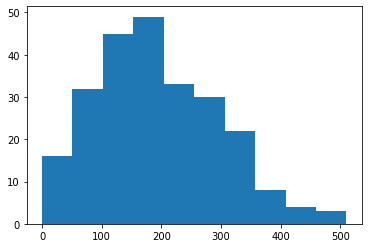

In [134]:
# plot the distribution of the number of calories in drinks using matplotlib
import matplotlib.pyplot as plt
plt.hist(df['calories'])
plt.show()

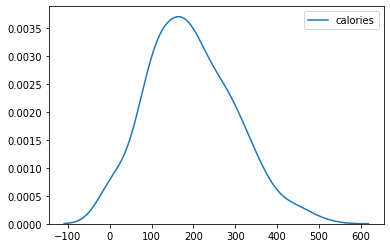

In [142]:
# plot the same distribution using seaborn. what about a density plot instead?
import seaborn as sns
sns.kdeplot(df['calories'])

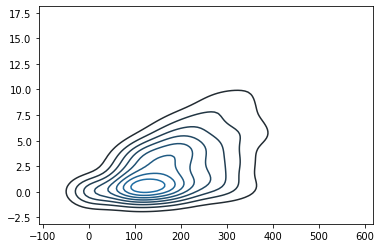

In [150]:
# plot calories against total fat using seaborn
sns.kdeplot(df[['calories','total fat']])

In [ ]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.
Short = df[(df['beverage prep']=='Short') | (df['beverage prep']=='Short Nonfat Milk')]
Tall = df[(df['beverage prep']=='Tall') | (df['beverage prep']=='Tall Nonfat Milk')]
Grande = df[(df['beverage prep']=='Grande') | (df['beverage prep']=='Grande Nonfat Milk')]
Vente = df[(df['beverage prep']=='Vente') | (df['beverage prep']=='Venti Nonfat Milk')]

[None]

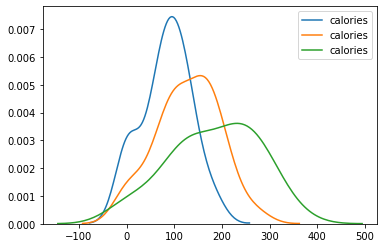

In [170]:
sns.kdeplot(Short['calories']).set(label='Short Drinks')
sns.kdeplot(Tall['calories']).set(label='Tall Drinks')
sns.kdeplot(Grande['calories']).set(label='Grande Drinks')

[Text(0.5, 1.0, 'Short Drinks')]

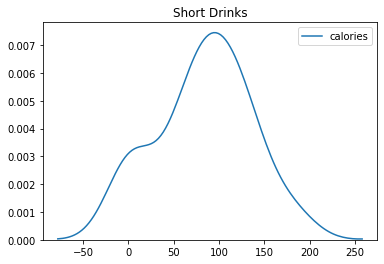

In [165]:
sns.kdeplot(Short['calories']).set(title='Short Drinks')

[Text(0.5, 1.0, 'Tall Drinks')]

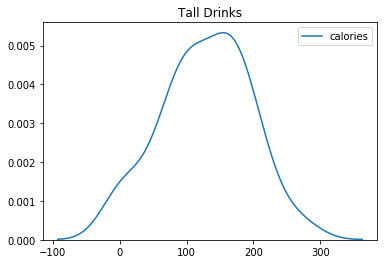

In [166]:
sns.kdeplot(Tall['calories']).set(title='Tall Drinks')

[Text(0.5, 1.0, 'Grande Drinks')]

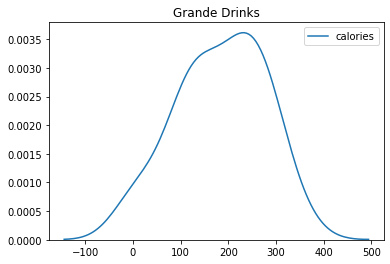

In [167]:
sns.kdeplot(Grande['calories']).set(title='Grande Drinks')

[Text(0.5, 1.0, 'Vente Drinks')]

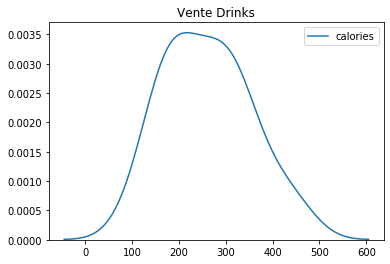

In [168]:
sns.kdeplot(Vente['calories']).set(title='Vente Drinks')